In [10]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
def LSM(_xdata, _ydata, _coefs, _order):
    _a = np.array([[0.0 for j in range(_order + 2)] for i in range(_order + 1)])
    _sum_of_powers = np.array([0.0 for i in range(_order * 2 + 1)])
    
    # Create Enlarged coeffient matrix
    for k in range(len(_xdata)):
        for i in range(0, (_order * 2) + 1, 1):
            _sum_of_powers[i] += pow(_xdata[k], i)
        for i in range(_order + 1):
            _a[i][_order + 1] += pow(_xdata[k], i) * _ydata[k]
    print(_sum_of_powers)
    for i in range(_order + 1):
        for j in range(_order + 1):
            _a[i][j] = _sum_of_powers[i + j]
    print('Enlarged coeffient matrix : ')
    print(_a)
    # Gauss-Jordan method　w/o pivot selection
    for k in range(_order + 1):
        _pivot = _a[k][k]
        for j in range(k, _order + 2):
            _a[k][j] /= _pivot
        for i in range(_order + 1):
            if(k != i):
                for j in range(k, _order + 2):
                    _a[i][j] -= _a[i][k] * _a[k][j]
    for i in range(_order + 1):
        _coefs.append(_a[i][_order + 1])
        
def LSM2(_xdata, _ydata, _coefs, _order):
    """LSM with scaling xdata process
    """
    _a = np.array([[0.0 for j in range(_order + 2)] for i in range(_order + 1)])
    _sum_of_powers = np.array([0.0 for i in range((_order * 2) + 1)])
       
    # Scaling xdata
    _s = 2 / (_xdata.max() - _xdata.min())
    _t = _s * _xdata.mean()
    _xdata = _s * _xdata - _t
    
    # Create Enlarged coeffient matrix
    for k in range(len(_xdata)):
        for i in range(0, (_order * 2) + 1, 1):
            _sum_of_powers[i] += pow(_xdata[k], i)
        for i in range(_order + 1):
            _a[i][_order + 1] += pow(_xdata[k], i) * _ydata[k]
    print(_sum_of_powers)
    for i in range(_order + 1):
        for j in range(_order + 1):
            _a[i][j] = _sum_of_powers[i + j]
    print('Enlarged coeffient matrix : ')
    print(_a)
    # Gauss-Jordan method　w/o pivot selection
    for k in range(_order + 1):
        _pivot = _a[k][k]
        for j in range(k, _order + 2):
            _a[k][j] /= _pivot
        for i in range(_order + 1):
            if(k != i):
                for j in range(k, _order + 2):
                    _a[i][j] -= _a[i][k] * _a[k][j]
    for i in range(_order + 1):
        _coefs.append(_a[i][_order + 1])
    print('Sweeped : ')
    print(_a)
    print(f's:{s}, t:{t}')
    print('Coeffient : ')
    print(_coefs)
    return _s, _t
            
xdata = np.array([-166.7 + i * 0.5 for i in range(0, 5, 1)])
ydata = np.array([2.7, 3.0, 2.95, 2.73, 2.62])
coeff = []
# LSM(xdata, ydata, coeff, 3)
s, t = LSM2(xdata, ydata, coeff, 3)
d0, c0, b0, a0 = coeff
a = s**3 * a0
b = -3 * s**2 * t * a0 + s ** 2 * b0
c = 3 * s * t ** 2 * a0 - 2 * s * t * b0 + s * c0
d = -t ** 3 * a0 + t ** 2 * b0 - t * c0 + d0

print(f'{a} : {b} : {c} : {d}')

x = np.linspace(xdata.min() - 1.0, xdata.max() + 1.0, 1000)
y = a * x ** 3 + b * x ** 2 + c * x + d
# y = a * (s*x-t) ** 3 + b * (s*x-t) ** 2 + c * (s*x-t) + d
W3 = Polynomial.fit(xdata, ydata, 3)
W3.convert().coef

[5.      0.      2.5     0.      2.125   0.      2.03125]
Enlarged coeffient matrix : 
[[ 5.       0.       2.5      0.      14.     ]
 [ 0.       2.5      0.       2.125   -0.215  ]
 [ 2.5      0.       2.125    0.       6.7525 ]
 [ 0.       2.125    0.       2.03125 -0.11375]]
Sweeped : 
[[ 1.          0.          0.          0.          2.8       ]
 [ 0.          1.          0.          0.         -0.086     ]
 [ 0.          0.          1.          0.          3.17764706]
 [ 0.          0.          0.          1.         -0.056     ]]
s:1.0, t:-165.7
Coeffient : 
[2.8, -0.08599999999999994, 3.1776470588235295, -0.05600000000000001]
-0.05600000000000001 : -24.65995294117647 : -3559.704084705883 : -167538.67751388237


array([1.38737162e+06, 2.51658853e+04, 1.52161143e+02, 3.06666667e-01])

MSE: 2.8571428571429127e-05


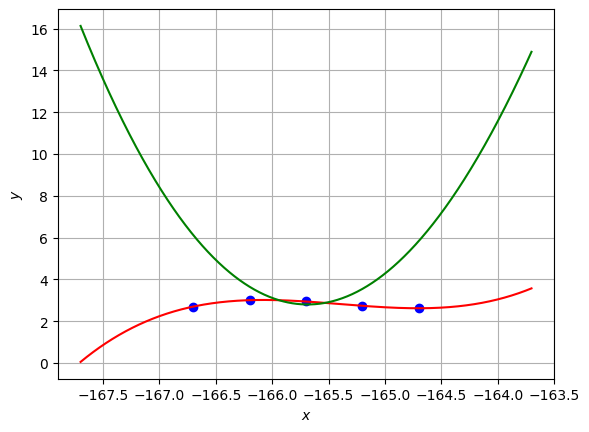

In [82]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, marker='o', color='b')
ax.plot(x, W3(x), color='r', label='numpy.poly')
ax.plot(x, y, color='g', label='LSM')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid()

MSE = np.mean((ydata - W3(xdata)) ** 2)
print(f'MSE: {MSE}')